In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [6]:
# Check missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
# Check class distribution (Ratings)
df['Rating'].value_counts().sort_index()

Rating
1    1421
2    1793
3    2184
4    6039
5    9054
Name: count, dtype: int64

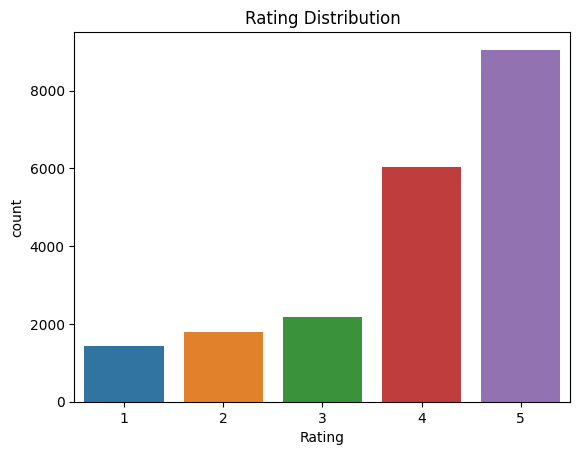

In [8]:
# Plot rating count
sns.countplot(data=df, x='Rating')
plt.title("Rating Distribution")
plt.show()

In [9]:
# Use sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split dataset
X = df['Review']
y = df['Rating']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [13]:
# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.49      0.58       292
           2       0.36      0.07      0.11       333
           3       0.50      0.03      0.05       432
           4       0.44      0.33      0.37      1252
           5       0.57      0.92      0.71      1790

    accuracy                           0.55      4099
   macro avg       0.52      0.37      0.37      4099
weighted avg       0.52      0.55      0.48      4099

